### Datasets
    - gdsc --> gg
    - ctrp --> cc
### Models
    - lgb
    - nn0
    - nn1
    
### Runs:
`../lc.out.summit.July2020/exp1_scores`<br>
    - summit run (completed runs for very large sizes: 600K>)<br>
    - haven't calculated MCC<br>
    
`../lc.out.nci60.split0/`

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from load_modules import *
%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

Current path: /vol/ml/apartin/projects/dr-learning-curves/nbs


## Path to data

In [2]:
method = 'ls_hpo'
# method = 'ps_hpo'

In [3]:
fname = 'all_scores.csv'
# dpath = Path('../lc.out.summit.July2020/exp1_scores')
dpath = Path('../lc.out.summit.July2020/exp_1_and_2')

dirs = glob(str(dpath/'*'))
print(dirs)

['../lc.out.summit.July2020/exp_1_and_2/lc.ctrp.nn_reg0.ls_hpo', '../lc.out.summit.July2020/exp_1_and_2/lc.ctrp.nn_reg1.ls_hpo', '../lc.out.summit.July2020/exp_1_and_2/lc.nci60.nn_reg0.random.ls_hpo', '../lc.out.summit.July2020/exp_1_and_2/lc.nci60.nn_reg1.random.ls_hpo']


In [ ]:
src = 'NCI60'
nn0_rnd_path = Path(dpath, f'lc.nci60.nn_reg0.random.{method}', fname)
nn1_rnd_path = Path(dpath, f'lc.nci60.nn_reg1.random.{method}', fname)

# nn0_flt_path = Path(dpath, f'lc.nci60.nn_reg0.flatten.{method}', fname)
# nn1_flt_path = Path(dpath, f'lc.nci60.nn_reg1.flatten.{method}', fname)
nn0_flt_path = None
nn1_flt_path = None

# lgb_path = None
# lgb_path = Path('../lc.out.nci60.lgb/lc.nci60.lgb.ls_hpo', fname)
lgb_path_hpo = Path('../lc.out.nci60.lgb/lc.nci60.lgb.ls_hpo', fname)
lgb_path_dft = Path('../lc.out.nci60.lgb/lc.nci60.lgb.dflt', fname)

In [ ]:
outpath = fpath/f'summit_fits_{src}'
os.makedirs(outpath, exist_ok=True)

## Load data

In [ ]:
def get_data(path, tr_set='te'):
    if path is None:
        return None
    else:
        return load_data(path, tr_set=tr_set);

nn0_rnd = get_data(nn0_rnd_path, tr_set='te');
nn1_rnd = get_data(nn1_rnd_path, tr_set='te');

nn0_flt = get_data(nn0_flt_path, tr_set='te');
nn1_flt = get_data(nn1_flt_path, tr_set='te');

lgb_hpo = get_data(lgb_path_hpo, tr_set='te');
lgb_dft = get_data(lgb_path_dft, tr_set='te');

In [8]:
def print_count(aa):
    # aa = nn0_rnd
    aa['one'] = 1
    aa = aa[(aa['set']=='te') & (aa['metric']=='mean_absolute_error')]
    display(aa.groupby(['tr_size']).agg({'one': 'sum'}).sort_values('tr_size').reset_index())
    
print_count(aa=nn0_rnd)
print_count(aa=nn1_rnd)

,tr_size,one
0,100000,20
1,118957,20
2,141508,20
3,168334,20
4,200246,19
5,238207,20
6,283365,20
7,337084,20
8,369806,2
9,400986,20


,tr_size,one
0,100000,20
1,118957,20
2,141508,20
3,168334,20
4,200246,20
5,238207,20
6,283365,20
7,337084,20
8,400986,20
9,477002,20


## Raw plots

In [9]:
# Global plotting params
# -------------------------------
met = 'mean_absolute_error'; startParams = {'a': 1.2, 'b': -0.4, 'c': 0.04}
# met = 'mcc'; startParams = {'a': 1.2, 'b': 0.4, 'c': 0.8}

t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
# xtick_scale = 'log10'
# ytick_scale = 'log10'
# xtick_scale = 'linear'
# ytick_scale = 'linear'

kwargs = {'metric_name': met,
          'tr_set': t_set,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale,
          'plot_median': True}

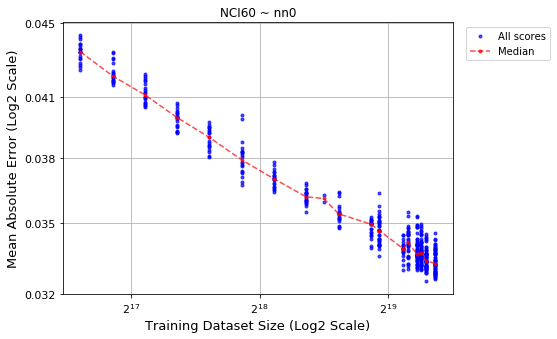

In [10]:
# Plot random
# -------------------------------
if nn0_rnd is not None:
    kwargs.update({'title': f'{src} ~ nn0'})
    ax = lc_plots.plot_lc_single_metric(nn0_rnd, **kwargs);

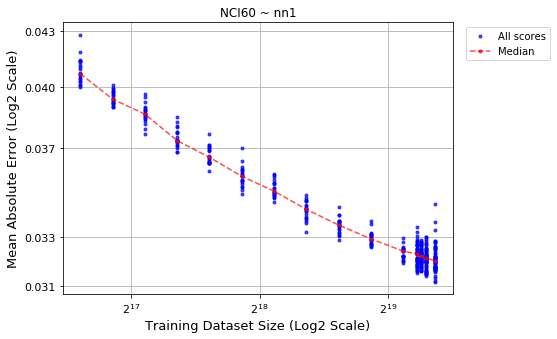

In [11]:
# Plot random
# -------------------------------
if nn1_rnd is not None:
    kwargs.update({'title': f'{src} ~ nn1'})
    ax = lc_plots.plot_lc_single_metric(nn1_rnd, **kwargs);

In [12]:
# Plot flatten
# -------------------------------
if nn0_flt is not None:
    kwargs.update({'title': f'{src} ~ nn1'})
    ax = lc_plots.plot_lc_single_metric(nn0_flt, **kwargs);

In [13]:
# Plot flatten
# -------------------------------
if nn1_flt is not None:
    kwargs.update({'title': f'{src} ~ nn1'})
    ax = lc_plots.plot_lc_single_metric(nn1_flt, **kwargs);

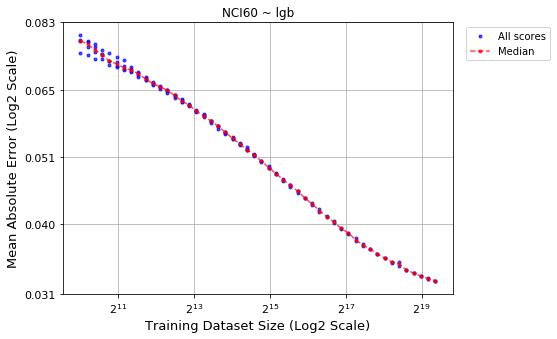

In [14]:
# Plot
# -------------------------------
if lgb_hpo is not None:
    kwargs.update({'title': f'{src} ~ lgb'})
    ax = lc_plots.plot_lc_single_metric(lgb_hpo, **kwargs);

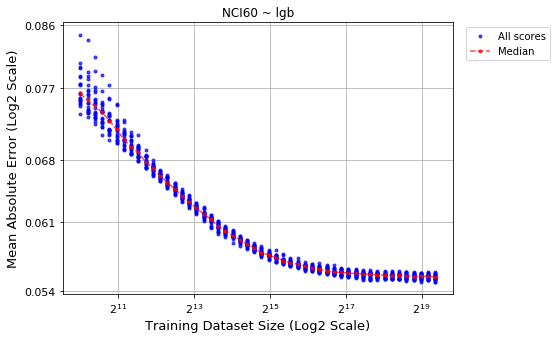

In [15]:
# Plot lgb_hpo
# -------------------------------
if lgb_dft is not None:
    kwargs.update({'title': f'{src} ~ lgb'})
    ax = lc_plots.plot_lc_single_metric(lgb_dft, **kwargs);

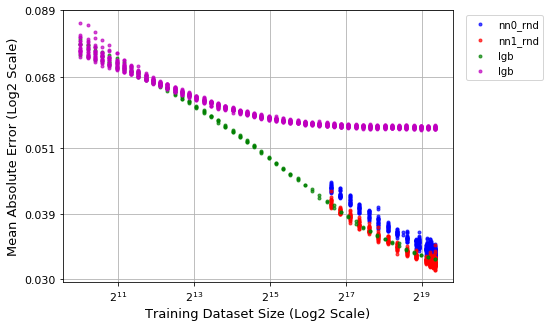

In [16]:
# Plot
# -------------------------------
ax = None
kwargs = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale}

if nn0_rnd is not None:
    nn0 = nn0_rnd.copy()
    nn0 = nn0[nn0.metric==met].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn0['tr_size'].values, y=nn0['score'].values, color='b', label='nn0_rnd', **kwargs, ax=ax);
    del nn0

if nn1_rnd is not None:
    nn1 = nn1_rnd.copy()
    nn1 = nn1[nn1.metric==met].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn1['tr_size'].values, y=nn1['score'].values, color='r', label='nn1_rnd', **kwargs, ax=ax);
    del nn1

if nn0_flt is not None:
    nn0 = nn0_flt.copy()
    nn0 = nn0[nn0.metric==met].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn0['tr_size'].values, y=nn0['score'].values, color='g', label='nn0_flt', **kwargs, ax=ax);
    del nn0

if nn1_flt is not None:
    nn1 = nn1_flt.copy()
    nn1 = nn1[nn1.metric==met].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn1['tr_size'].values, y=nn1['score'].values, color='y', label='nn1_flt', **kwargs, ax=ax);
    del nn1
    
if lgb_hpo is not None:
    lgb = lgb_hpo
    lgb = lgb[lgb.metric==met].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=lgb['tr_size'].values, y=lgb['score'].values, color='g', label='lgb', **kwargs, ax=ax);
    del lgb
    
if lgb_dft is not None:
    lgb = lgb_dft
    lgb = lgb[lgb.metric==met].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=lgb['tr_size'].values, y=lgb['score'].values, color='m', label='lgb', **kwargs, ax=ax);
    del lgb        

## Fitting

In [17]:
# # Choose the dataset
# df = nn0.copy(); model = 'nn0'
# # df = nn1.copy(); model = 'nn1'
# # df = lgb.copy(); model = 'LGBM'

# # ----------------
# # Prepare the data
# # ----------------
# df = df[ df['metric']==met ].reset_index(drop=True)
# print('Raw dataset of scores', df.shape)

# # Agg scores
# df['y'] = df['score']
# df = df[df['metric']==met].groupby('tr_size').agg({'y': 'median'}).reset_index()
# print('Agg with median', df.shape)

# # Split dfit and dext
# x_fit_mn = 1000
# x_fit_mx = None

# dfit = subset_data(df, col='tr_size', x_mn=x_fit_mn, x_mx=x_fit_mx)
# dfit = add_weight_col(dfit)

# print('dfit.shape:', dfit.shape)
# print('Train size (dfit):', dfit['tr_size'].unique())

In [18]:
nn0 = nn0_rnd
nn1 = nn1_rnd

# nn0 = nn0_flt
# nn1 = nn1_flt

In [19]:
def fit_data(df, x_fit_mn=0, x_fit_mx=None):
    if df is None:
        return None
    
    df = df[ df['metric']==met ].reset_index(drop=True)
    df['y'] = df['score']
    df = df[df['metric']==met].groupby('tr_size').agg({'y': 'median'}).reset_index()
    
    dfit = subset_data(df, col='tr_size', x_mn=x_fit_mn, x_mx=x_fit_mx)
    dfit = add_weight_col(dfit)
    return dfit

In [20]:
# Split dfit and dext
# x_fit_mn = 1000
# x_fit_mn = 30000
x_fit_mn = 100000
x_fit_mx = None

dfit_nn0 = fit_data(nn0, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_nn1 = fit_data(nn1, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_lgb_hpo = fit_data(lgb_hpo, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_lgb_dft = fit_data(lgb_dft, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)

In [21]:
# print(dfit_nn0.tr_size.values)
# display(dfit_nn0)

# print(dfit_nn1.tr_size.values)
# display(dfit_nn1)

In [22]:
# display(dfit_lgb)

In [23]:
pnts_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.5, 'ls': '', 'marker': '.'}
fit_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.5, 'ls': '--', 'marker': ''}

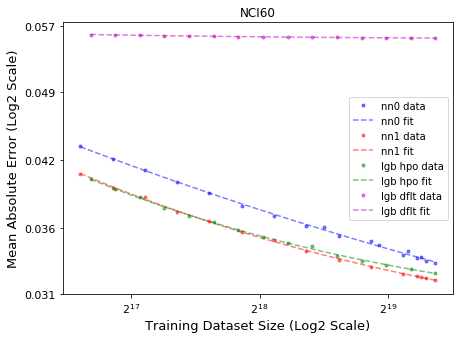

In [29]:
# Reset axes
ax = None

# NN0
if nn0 is not None:
    name = 'nn0'
    color = 'b'
    aa = dfit_nn0
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    cc_nn0 = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values)
    xf_plot_nn0, yf_plot_nn0 = cc_nn0.calc_fit( x1=xf[0], x2=xf[-1] )
    
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} data')
    ax = lc_plots.plot_lc(x=xf_plot_nn0, y=yf_plot_nn0, ax=ax, **fit_args, color=color, label=f'{name} fit')

# NN1
if nn1 is not None:
    name = 'nn1'
    color = 'r'
    aa = dfit_nn1
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    cc_nn1 = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values)
    xf_plot, yf_plot = cc_nn1.calc_fit( x1=xf[0], x2=xf[-1] )
    
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} fit')

# LGB HPO
if lgb_hpo is not None:
    lgb = lgb_hpo
    name = 'lgb hpo'
    color = 'g'
    aa = dfit_lgb_hpo
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    # cc_lgb = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values)  # commented
    cc_lgb = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
    xf_plot, yf_plot = cc_lgb.calc_fit( x1=xf[0], x2=xf[-1] )
    
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} fit')
    cc_lgb_hpo = cc_lgb
    del lgb, cc_lgb
    
# LGB Default
if lgb_dft is not None:
    lgb = lgb_dft
    name = 'lgb dflt'
    color = 'm'
    aa = dfit_lgb_dft
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    # cc_lgb = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values)  # commented
    cc_lgb = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
    xf_plot, yf_plot = cc_lgb.calc_fit( x1=xf[0], x2=xf[-1] )
    
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} fit')
    cc_lgb_dft = cc_lgb
    del lgb, cc_lgb

ax.set_title(f'{src}')
ax.legend(frameon=True, fontsize=10, loc='best')
ax.grid(False)

In [30]:
display(cc_nn0.coefs)

,coef,est,se,t_val,p_val
0,a,0.766287,0.415896,1.842498,0.085256
1,b,-0.306363,0.058232,-5.261042,0.000096
2,c,0.020781,0.003043,6.830279,0.000006


In [31]:
display(cc_nn1.coefs)

,coef,est,se,t_val,p_val
0,a,5.737252,1.893636,3.029755,1.047136e-02
1,b,-0.523364,0.031121,-16.817074,1.044304e-09
2,c,0.026879,0.000465,57.749974,4.798298e-16


In [33]:
display(cc_lgb_hpo.coefs)

,coef,est,se,t_val,p_val
0,a,11.760914,5.463360,2.152689,5.239114e-02
1,b,-0.598681,0.043008,-13.920190,9.103955e-09
2,c,0.028672,0.000462,62.084135,2.018880e-16


In [34]:
display(cc_lgb_dft.coefs)

,coef,est,se,t_val,p_val
0,a,1.529741,3.291425,0.464766,6.504192e-01
1,b,-0.673202,0.196204,-3.431128,4.975289e-03
2,c,0.055234,0.000096,573.659474,5.302262e-28


In [33]:
aa = nn0
aa['std'] = aa['score']
aa['min'] = aa['score']
aa['max'] = aa['score']
aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
aa = aa.rename(columns={'score': 'MAE_median'})
aa['%'] = aa['std']/aa['MAE_median']
aa

,tr_size,MAE_median,std,min,max,%
0,100000,0.586244,0.373950,0.004048,0.893044,0.637874
1,118957,0.602956,0.376947,0.003860,0.893524,0.625165
2,141508,0.608080,0.379911,0.003650,0.892179,0.624772
3,168334,0.624156,0.383280,0.003417,0.891677,0.614077
4,200246,0.636239,0.385879,0.003290,0.892051,0.606500
5,238207,0.641333,0.388375,0.003103,0.892328,0.605575
6,283365,0.654167,0.390766,0.002955,0.891895,0.597348
7,337084,0.666805,0.392812,0.002835,0.892562,0.589096
8,369806,0.671750,0.402578,0.002930,0.889437,0.599297
9,400986,0.670893,0.394836,0.002767,0.894595,0.588522


In [34]:
aa = nn1
aa['std'] = aa['score']
aa['min'] = aa['score']
aa['max'] = aa['score']
aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
aa = aa.rename(columns={'score': 'MAE_median'})
aa['%'] = aa['std']/aa['MAE_median']
aa

,tr_size,MAE_median,std,min,max,%
0,100000,0.612662,0.381240,0.003602,0.895280,0.622267
1,118957,0.622822,0.384644,0.003362,0.893616,0.617582
2,141508,0.639780,0.386982,0.003217,0.893529,0.604867
3,168334,0.637350,0.389727,0.003070,0.893850,0.611481
4,200246,0.658504,0.391969,0.002917,0.893077,0.595242
5,238207,0.664464,0.394214,0.002811,0.892591,0.593281
6,283365,0.668861,0.395684,0.002716,0.896712,0.591579
7,337084,0.680623,0.397958,0.002550,0.903871,0.584697
8,400986,0.681768,0.399471,0.002479,0.906550,0.585934
9,477002,0.691261,0.400778,0.002408,0.910074,0.579779


In [35]:
aa = lgb
aa['std'] = aa['score']
aa['min'] = aa['score']
aa['max'] = aa['score']
aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
aa = aa.rename(columns={'score': 'MAE_median'})
aa['%'] = aa['std']/aa['MAE_median']
aa

,tr_size,MAE_median,std,min,max,%
0,1024,0.077664,0.002073,0.074227,0.079102,0.026694
1,1169,0.076622,0.001724,0.073735,0.077468,0.022499
2,1334,0.075163,0.001774,0.072674,0.076723,0.023597
3,1523,0.073771,0.001042,0.072539,0.075082,0.014131
4,1739,0.072076,0.001346,0.071197,0.074345,0.018679
5,1985,0.071373,0.001241,0.070496,0.073214,0.017390
6,2267,0.070404,0.001123,0.069848,0.072320,0.015945
7,2588,0.069752,0.000612,0.069282,0.070677,0.008771
8,2954,0.068869,0.000515,0.068057,0.069197,0.007471
9,3373,0.067554,0.000438,0.067228,0.068175,0.006478


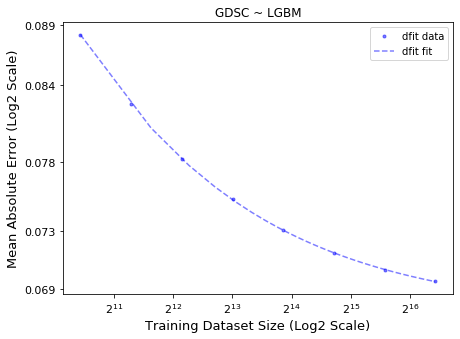

In [55]:
xf = dfit['tr_size'].values
# xe = dext['tr_size'].values
yf = dfit['y'].values
# ye = dext['y'].values

cc = FitPwrLaw(xf=dfit['tr_size'].values, yf=dfit['y'].values, w=dfit['w'].values)
xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
# xe_plot, ye_plot = cc.calc_fit( x1=xe[0], x2=xe[-1] )

# Reset axes
ax = None

# Raw data
ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color='b', label='dfit data')
# ax = lc_plots.plot_lc(x=xe, y=ye, ax=ax, **pnts_args, color='r', label='dext data')

# Fits
ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color='b', label='dfit fit')
# ax = lc_plots.plot_lc(x=xe_plot, y=ye_plot, ax=ax, **fit_args, color='r', label='dext fit')

ax.set_title(f'{src} ~ {model}')
ax.legend(frameon=True, fontsize=10, loc='best')
ax.grid(False)

## Plot together